# Noca Nocca

In [1]:
from games.nocca_nocca.nocca_nocca import NoccaNocca
from agents.agent_random import RandomAgent
from agents.minimax import MiniMax   
from agents.mcts import MonteCarloTreeSearch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Run(game, agents, verbose = True, n=10):
    categories = ["Ganados", "Empatados", "Perdidos"]
    results = {
        k: [0, 0, 0] for k, _ in agents.items()
    }

    for i in range(n):
        game.reset()
        if verbose:
            print(f"Initial Agent: {game.agent_selection} ({agents[game.agent_selection][0]})")
        while not game.game_over():
            game.render()
            action = agents[game.agent_selection][1].action()
            if verbose:
                print(f"Turn {game.steps} -- Agent {game.agent_selection} ({agents[game.agent_selection][0]}) plays action {action}")
            game.step(action=action)
        game.render()
        if game.truncated():
            if verbose:
                print("Game was truncated")
        for agent in agents:
            if verbose:
                print(f"Reward agent {agent} ({agents[agent][0]}): {game.reward(agent)}")

        winner = game.check_for_winner()
        if verbose:
            if winner is None:
                print(f"Drawn game")
            else:
                print(f"The winner is: {winner} ({agents[winner][0]})")

        for agent in agents:
            if winner is None:
                results[agent][1] += 1
            elif winner == agent:
                results[agent][0] += 1
            else:
                results[agent][2] += 1

    _, ax = plt.subplots()
    x = np.arange(len(categories))
    bar_width = 0.35
    agent_ids = list(agents)

    ax.bar(x - bar_width/2, results[agent_ids[0]], bar_width, label=agents[agent_ids[0]][0])
    ax.bar(x + bar_width/2, results[agent_ids[1]], bar_width, label=agents[agent_ids[1]][0])

    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_ylabel('Cantidad')
    ax.set_title(f"Comparación de resultados sobre {n} juegos")
    ax.legend()
    ax.set_ylim(0, max(results[agent_ids[0]] + results[agent_ids[1]]) * 1.1)

    plt.show()

In [3]:
game = NoccaNocca(max_steps=150, initial_player=0, seed=1)

### Minmax, depth=1 vs Minmax, depth=1

Initial Agent: Black (MiniMax_depth_1)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MiniMax_depth_1) plays action 54
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 0__ 0__ 0__ 
2: ___ ___ 0__ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MiniMax_depth_1) plays action 266
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 0__ 0__ 0__ 
2: ___ ___ 0__ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 11_ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MiniMax_depth_1) plays action 60
0: ___ ___ ___ ___ ___ 
1: 0__ ___ ___ 0__ 0__ 
2: ___ 0__ 0__ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 11_ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Agent White (M

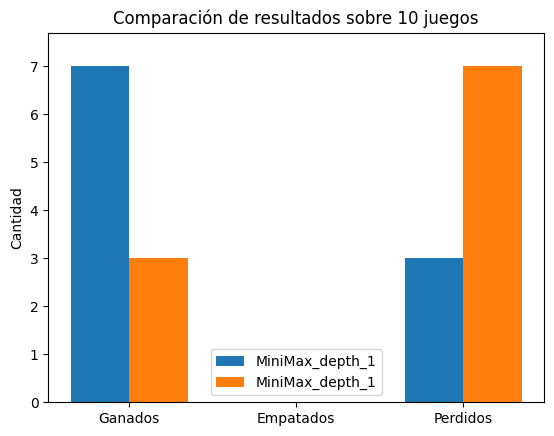

In [4]:
Run(game, {
    game.agents[0]: ("MiniMax_depth_1", MiniMax(game=game, agent=game.agents[0], depth=1)),
    game.agents[1]: ("MiniMax_depth_1", MiniMax(game=game, agent=game.agents[1], depth=1)),
})

### Minmax, depth=2 vs Minmax, depth=1

Initial Agent: Black (MiniMax_depth_2)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MiniMax_depth_2) plays action 51
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 00_ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MiniMax_depth_1) plays action 256
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 00_ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ 1__ ___ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MiniMax_depth_2) plays action 70
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 00_ ___ 0__ 
2: ___ ___ ___ ___ 0__ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ 1__ ___ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Agent White (M

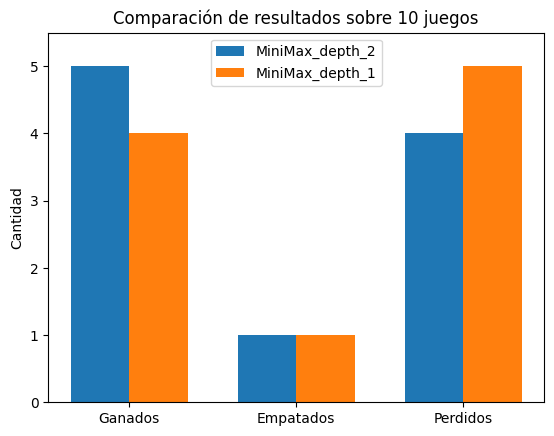

In [5]:
Run(game, {
    game.agents[0]: ("MiniMax_depth_2", MiniMax(game=game, agent=game.agents[0], depth=2)),
    game.agents[1]: ("MiniMax_depth_1", MiniMax(game=game, agent=game.agents[1], depth=1)),
})

### MCTS, max_depth=5 vs Random

Initial Agent: Black (MCTS_maxdepth_5)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MCTS_maxdepth_5) plays action 67
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ ___ 00_ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (Random) plays action 261
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ ___ 00_ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ 1__ ___ ___ ___ 
6: 1__ 1__ ___ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MCTS_maxdepth_5) plays action 73
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ ___ 0__ 
2: ___ ___ ___ ___ 0__ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ 1__ ___ ___ ___ 
6: 1__ 1__ ___ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Agent White (Random) pl

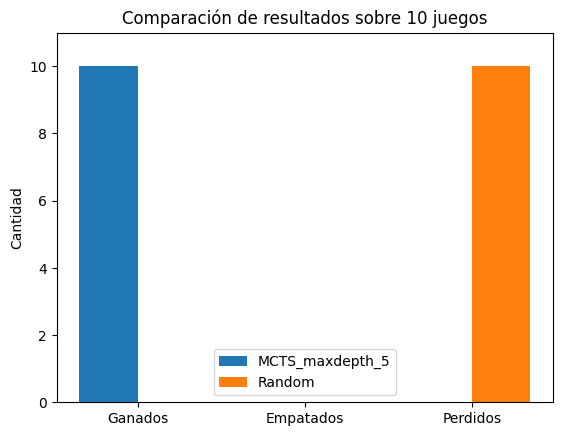

In [6]:
Run(game, {
    game.agents[0]: ("MCTS_maxdepth_5", MonteCarloTreeSearch(game=game, agent=game.agents[0], max_depth=5)),
    game.agents[1]: ("Random", RandomAgent(game=game, agent=game.agents[1])),
})

### MCTS, max_depth=10 vs MinMax, depth=1

Initial Agent: Black (MCTS_maxdepth_10)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MCTS_maxdepth_10) plays action 70
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ ___ 0__ 
2: ___ ___ ___ ___ 0__ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MiniMax_depth_1) plays action 256
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ ___ 0__ 
2: ___ ___ ___ ___ 0__ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ 1__ ___ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MCTS_maxdepth_10) plays action 62
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ ___ ___ 0__ 
2: ___ ___ ___ 0__ 0__ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ 1__ ___ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Agent White

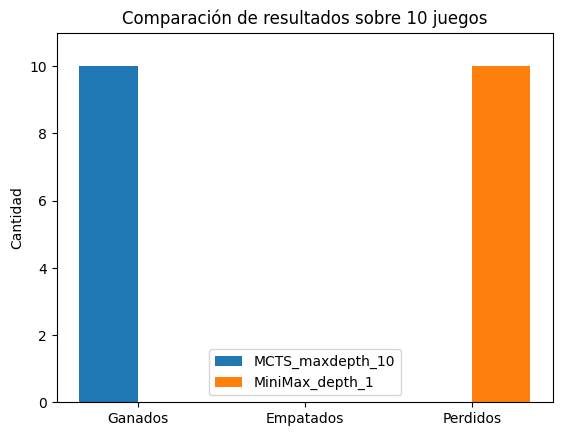

In [7]:
Run(game, {
    game.agents[0]: ("MCTS_maxdepth_10", MonteCarloTreeSearch(game=game, agent=game.agents[0], max_depth=10)),
    game.agents[1]: ("MiniMax_depth_1", MiniMax(game=game, agent=game.agents[1], depth=1)),
})

### MCTS, max_depth=10 vs MCTS, max_depth=5

Initial Agent: Black (MCTS_maxdepth_10)
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 0 -- Agent Black (MCTS_maxdepth_10) plays action 67
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ ___ 00_ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 1 -- Agent White (MCTS_maxdepth_5) plays action 269
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ ___ 00_ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 2 -- Agent Black (MCTS_maxdepth_10) plays action 49
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 0__ ___ 00_ 
2: ___ 0__ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ 1__ 1__ ___ 1__ 
7: ___ ___ ___ ___ ___ 
Turn 3 -- Agent White

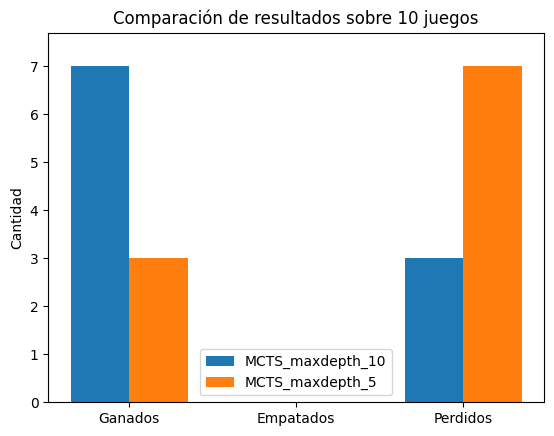

In [8]:
Run(game, {
    game.agents[0]: ("MCTS_maxdepth_10", MonteCarloTreeSearch(game=game, agent=game.agents[0], max_depth=10)),
    game.agents[1]: ("MCTS_maxdepth_5", MonteCarloTreeSearch(game=game, agent=game.agents[1], max_depth=5)),
})